<h1><center>Starter Code for Environment Classification</center></h1>

![](https://images.aicrowd.com/raw_images/challenges/banner_file/897/b4a0766bb1ef4b621e3a.jpg)

In this challenge, you will have images of a self driving car moving through a town in different weather conditions. Your goal will be to classify the environment into 5 different classes ( using unsupervised methonds ), 1 means the weather is really good for a self driving car while 5 means the weather is very challenging for a self driving car.

### What we are going to Learn

  - Unsupvised Image Classification

**Note : Create a copy of the notebook and use the copy for submission. Go to *File > Save a Copy in Drive* to create a new copy**

# Downloading Dataset

So we will first need to login to AIcrowd that will allow us to download the dataset after the API key is validated and saved.

In [ ]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

     |████████████████████████████████| 43 kB 936 kB/s 
     |████████████████████████████████| 62 kB 863 kB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 209 kB 35.3 MB/s 
     |████████████████████████████████| 170 kB 66.7 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 51 kB 6.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/iRj_laensZRSkACTzZyNd2BCDFCbLDz9HAUrWsMetEk
API Key valid
Saved API Key successfully!


In [ ]:
# Downloading the Dataset
!rm -rf data
!mkdir data
%aicrowd ds dl -c environment-classification -o data

images.zip:   0%|          | 0.00/22.8M [00:00<?, ?B/s]

In [ ]:
# Unzipping and Organising the datasets
!unzip data/images.zip  -d data/images > /dev/null

# Importing Libraries

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from glob import glob
from natsort import natsorted
import cv2
import os
import numpy as np 
import random
from PIL import Image

## Visualize the data 👀

In [ ]:
images_folder = "data/images"

In [ ]:
images_list = natsorted(glob(images_folder+"/*"))

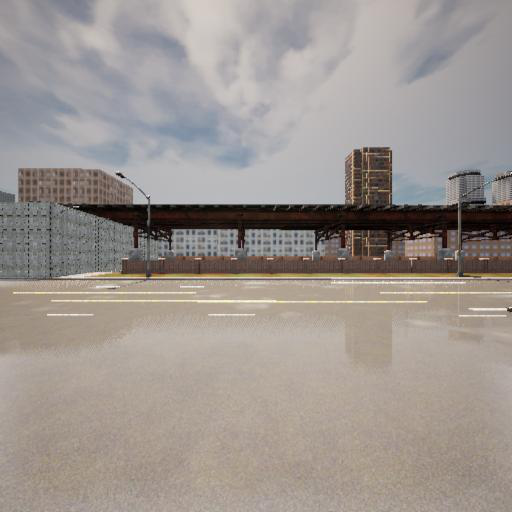

In [ ]:
img = Image.open(random.choice(images_list))
img

# Loading the dataset

In [ ]:
images_data = np.array([cv2.imread(image_path, 0).flatten()  for image_path in images_list])
images_data.shape

(700, 262144)

# Creating the model

Here, we will be using KMeans from sklearn model which is used in unsupervised data classification

In [ ]:
#           Number of classes
model = KMeans(n_clusters=5, n_jobs=-1) 

model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Training the model

In [ ]:
model.fit(images_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Generating the predictions

In [ ]:
predictions = model.predict(images_data)
predictions.shape

(700,)

In [ ]:
df = pd.DataFrame({"ImageID":range(len(images_data)), "label":predictions})
df['ImageID'] = df["ImageID"].astype(int)
df = df.sort_values("ImageID").reset_index(drop=True)
df

ImageID  label
0          0      2
1          1      3
2          2      3
3          3      4
4          4      2
..       ...    ...
695      695      4
696      696      4
697      697      2
698      698      3
699      699      4

[700 rows x 2 columns]

# Submitting Results 📄

In [ ]:
!rm -rf assets
!mkdir assets

df.to_csv(os.path.join("assets", "submission.csv"), index=False)

**Note : Please make sure that there should be filename `submission.csv` in `assets` folder before submitting it**

## Uploading the Results

In [ ]:
!aicrowd notebook submit -c environment-classification -a assets --no-verify

Mounting Google Drive 💾
Your Google Drive will be mounted to access the colab notebook
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWiM7dctdDyp3ZUKXUg0cRuhmO4BYeiJJOlJySgq2Qh8IjNk3qf62A4
Mounted at /content/drive
Using notebook: /content/drive/MyDrive/Colab Notebooks/Unsupervised Environment Classification for submission...
Scrubbing API keys f